In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
dataset = keras.datasets.fashion_mnist

In [ ]:
train, test = dataset.load_data()
x_train, y_train = train
x_test, y_test = test

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

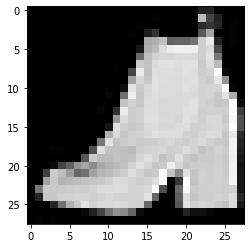

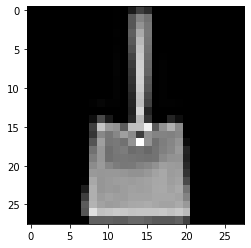

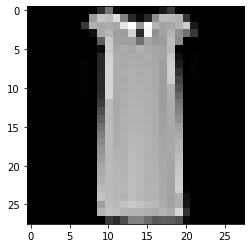

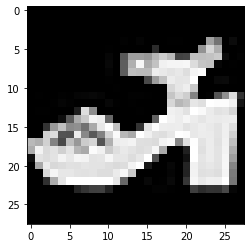

In [ ]:
from matplotlib import pyplot as plt
for i in range(4):  
  plt.imshow(x_train[i+800], cmap='gray')
  plt.show()

In [ ]:
x_val, xtrain = x_train[ : 5000] / 255.0, x_train[5000 : ] / 255.0
y_val, ytrain = y_train[ : 5000], y_train[5000 : ]

In [ ]:
import numpy as np
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
print(y_train[0])
class_names[y_train[0]]

9


'Ankle boot'

In [ ]:
y_train.shape

(60000,)

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28,28]))
model.add(keras.layers.Dense(300, activation = 'relu'))
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(xtrain, ytrain, epochs = 30, validation_data = (x_val, y_val))

Epoch 1/30
1719/1719 [==============================] - 9s 4ms/step - loss: 0.4884 - accuracy: 0.8264 - val_loss: 0.3881 - val_accuracy: 0.8614
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3630 - accuracy: 0.8665 - val_loss: 0.3447 - val_accuracy: 0.8716
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3269 - accuracy: 0.8793 - val_loss: 0.3501 - val_accuracy: 0.8726
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3059 - accuracy: 0.8872 - val_loss: 0.3269 - val_accuracy: 0.8824
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2884 - accuracy: 0.8921 - val_loss: 0.3467 - val_accuracy: 0.8704
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2753 - accuracy: 0.8953 - val_loss: 0.3135 - val_accuracy: 0.8824
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2596 - accuracy: 0.9019 - val_loss: 0.3146 - val_accuracy:

(0.0, 1.0)

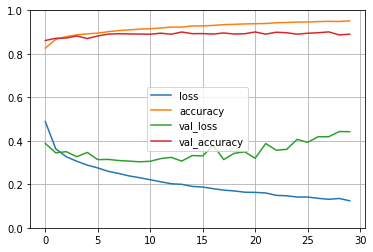

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot() 
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1] plt.show()

In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 94.6501 - accuracy: 0.8603


[94.65011596679688, 0.8603000044822693]

In [ ]:
x= x_test[9:12]

In [ ]:
x.shape

(3, 28, 28)

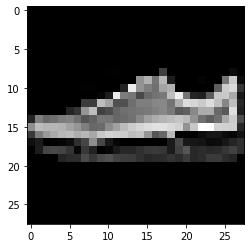

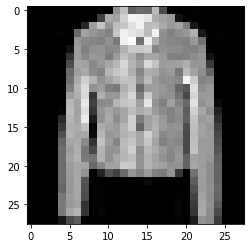

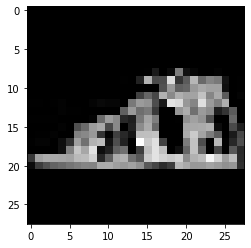

In [ ]:
from matplotlib import pyplot as plt
for i in range(3):  
  plt.imshow(x_test[i+9], cmap='gray')
  plt.show()

In [ ]:
pred = model.predict(x)

In [ ]:
pred

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]